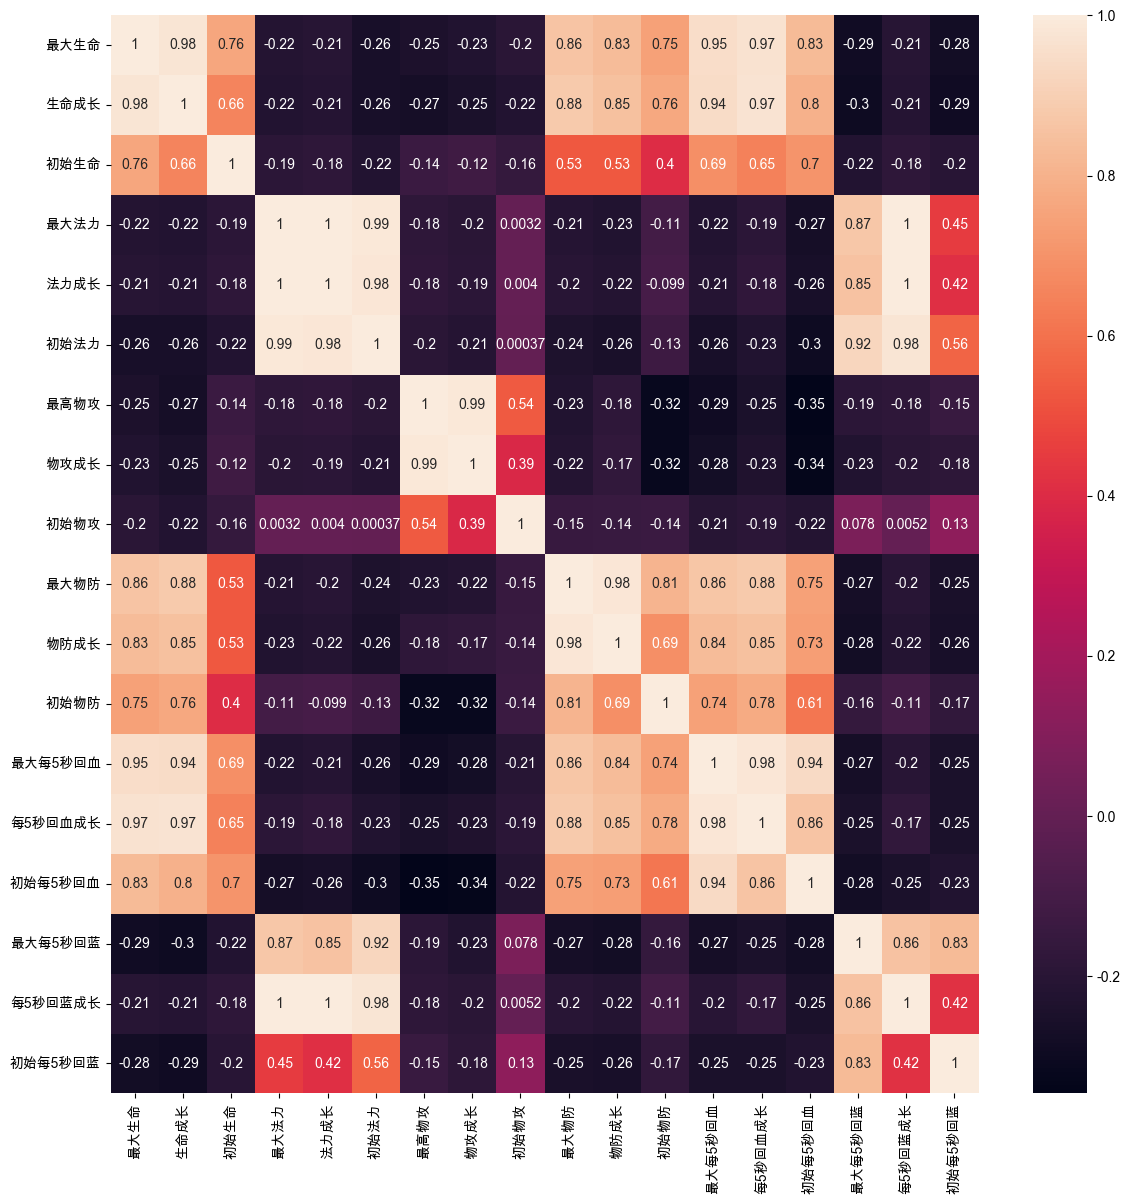

[ 6 11 14 13  2  2  4 14 13 28  0  6 13 23 21  0 26 13 22 15  9  8 15  8
  8  8 15  3 10 16 23 10  1 10 16 10 10 18 17  1  1 10 10 16 10  1 11 17
 11 10 29 24 22 25 25  6 26 11 27 22 26  7 20  6 12 19 19  5  3]
EM accuracy score is: 19.88550080145734


In [10]:
# -*- coding:utf-8 -*-

import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# load data
data_ori = pd.read_csv('./data/heros.csv', encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]

# print(data.info())

# Visual analysis of the relationship between hero attributes
# set plt, show chinese
plt.rcParams['font.sans-serif']  = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']  = False

corr = data[features].corr()
plt.figure(figsize=(14,14))

# annot = True
sns.heatmap(corr, annot=True)
plt.show()

# Dimensionality reduction of attributes
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程':1, '近战':0})

ss = StandardScaler()
data = ss.fit_transform(data)

gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)

prediction = gmm.predict(data)
print(prediction)

data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./data/heros_out.csv', index = False, sep=',')

from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(data, prediction)

print(f'EM accuracy score is: {score}')